Old and Modern Music Lyrics Analysis

This project is an analysis of music lyrics from 1950 to 2019 which focuses on analysing the key differences in sentiment, keywords and general topics over time.

Run all cells below to view how music lyrics has evolved and changed over the years.

In [22]:
#Importing all necessary packages

#Basic libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

#SK-Learn utils
from sklearn.feature_extraction import _stop_words as stop_words 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#NLTK utils
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Let's load the music lyrics dataset and view the column names

In [23]:
data = pd.read_csv("dataset/musicLyricsDataset.csv", index_col=0)

#view the header row names
category_row = data.iloc[0].index

print(category_row)

Index(['artist_name', 'track_name', 'release_date', 'genre', 'lyrics', 'len',
       'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'like/girls', 'sadness', 'feelings', 'danceability', 'loudness',
       'acousticness', 'instrumentalness', 'valence', 'energy', 'topic',
       'age'],
      dtype='object')


Let's remove the columns we don't need

In [24]:
data.drop('len', axis=1, inplace=True)
data.drop('dating', axis=1, inplace=True)
data.drop('world/life', axis=1, inplace=True)
data.drop('night/time', axis=1, inplace=True)
data.drop('shake the audience', axis=1, inplace=True)
data.drop('family/gospel', axis=1, inplace=True)
data.drop('romantic', axis=1, inplace=True)
data.drop('communication', axis=1, inplace=True)
data.drop('obscene', axis=1, inplace=True)
data.drop('music', axis=1, inplace=True)
data.drop('movement/places', axis=1, inplace=True)
data.drop('light/visual perceptions', axis=1, inplace=True)
data.drop('family/spiritual', axis=1, inplace=True)
data.drop('like/girls', axis=1, inplace=True)
data.drop('danceability', axis=1, inplace=True)
data.drop('loudness', axis=1, inplace=True)
data.drop('acousticness', axis=1, inplace=True)
data.drop('instrumentalness', axis=1, inplace=True)
data.drop('valence', axis=1, inplace=True)
data.drop('energy', axis=1, inplace=True)
data.drop('age', axis=1, inplace=True)

Now let's view the data to undestand it and see how it is treated.

In [25]:
data

,artist_name,track_name,release_date,genre,lyrics,violence,sadness,feelings,topic
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,0.063746,0.380299,0.117175,sadness
4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,0.096777,0.001284,0.001284,world/life
6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,0.002770,0.002770,0.225422,music
10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,0.001548,0.225889,0.001548,romantic
12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,0.001350,0.068800,0.001350,romantic
...,...,...,...,...,...,...,...,...,...
82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,0.001350,0.065664,0.001350,obscene
82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,0.001284,0.001284,0.001284,obscene
82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,0.154302,0.001504,0.001504,obscene
82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,0.001196,0.001196,0.001196,obscene


Now let's make two new columns for old music (any song before 1990) and modern music (any song after year 2000) which we will use later to compare differences

In [26]:
data['Old_Music'] = np.where(data['release_date'] < 1980, 1, 0)
data['Modern_Music'] = np.where(data['release_date'] > 1990, 1, 0)

data

,artist_name,track_name,release_date,genre,lyrics,violence,sadness,feelings,topic,Old_Music,Modern_Music
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,0.063746,0.380299,0.117175,sadness,1,0
4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,0.096777,0.001284,0.001284,world/life,1,0
6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,0.002770,0.002770,0.225422,music,1,0
10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,0.001548,0.225889,0.001548,romantic,1,0
12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,0.001350,0.068800,0.001350,romantic,1,0
...,...,...,...,...,...,...,...,...,...,...,...
82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,0.001350,0.065664,0.001350,obscene,0,1
82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,0.001284,0.001284,0.001284,obscene,0,1
82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,0.154302,0.001504,0.001504,obscene,0,1
82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,0.001196,0.001196,0.001196,obscene,0,1


This performs sentiment analysis on the first element of the lyrics column

In [27]:
analyzer = SentimentIntensityAnalyzer()

individual_sentiment = analyzer.polarity_scores(data['lyrics'][0])
individual_sentiment

{'neg': 0.233, 'neu': 0.467, 'pos': 0.3, 'compound': 0.3182}

Performing sentiment analysis on old and modern music

In [28]:
old_music_sentiments = []
modern_music_sentiments = []

# Iterate through the dataset
for index, row in data.iterrows():
    # Perform sentiment analysis on the lyrics column
    individual_sentiment = analyzer.polarity_scores(row['lyrics'])

    # Assign the sentiment scores to the appropriate category
    if row['Old_Music'] == 1:
        old_music_sentiments.append(individual_sentiment)
    elif row['Modern_Music'] == 1:
        modern_music_sentiments.append(individual_sentiment)


Calculating the avarage sentiment of old music lyrics

In [29]:
average_old_music_sentiment = {
    'neg': np.mean([score['neg'] for score in old_music_sentiments]),
    'neu': np.mean([score['neu'] for score in old_music_sentiments]),
    'pos': np.mean([score['pos'] for score in old_music_sentiments]),
    'compound': np.mean([score['compound'] for score in old_music_sentiments])
}

average_old_music_sentiment

{'neg': 0.1563676937018577,
 'neu': 0.5837085410058903,
 'pos': 0.25992195287720893,
 'compound': 0.2885024467603081}

Calculating the average sentiment of modern music lyrics

In [30]:
average_modern_music_sentiment = {
    'neg': np.mean([score['neg'] for score in modern_music_sentiments]),
    'neu': np.mean([score['neu'] for score in modern_music_sentiments]),
    'pos': np.mean([score['pos'] for score in modern_music_sentiments]),
    'compound': np.mean([score['compound'] for score in modern_music_sentiments])
}

average_modern_music_sentiment

{'neg': 0.19498886352631944,
 'neu': 0.5807484955384935,
 'pos': 0.2242622950819672,
 'compound': 0.08212494293421874}

And now visualised and compared in a graph

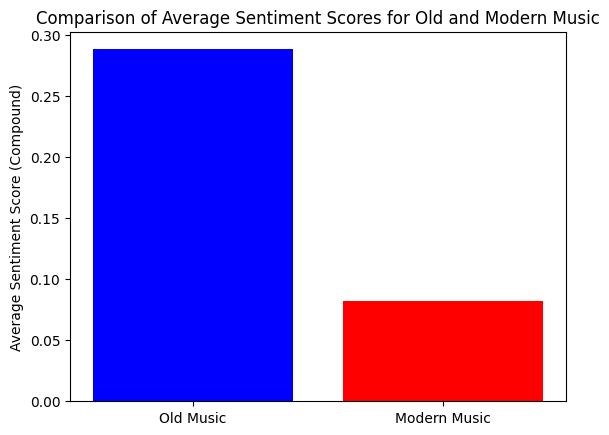

In [31]:
fig, ax = plt.subplots()

labels = ['Old Music', 'Modern Music']

bar_positions = range(len(labels))

ax.bar(bar_positions, [average_old_music_sentiment['compound'], average_modern_music_sentiment['compound']], color=['blue', 'red'])

ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)
ax.set_ylabel('Average Sentiment Score (Compound)')
ax.set_title('Comparison of Average Sentiment Scores for Old and Modern Music')

plt.show()

This graph shows how old music achieved a much higher avarage score compared to modern music. This means that the average sentiment in old music lyrics is much more positive compared to modern.

Now let's see what keywords are present in old and modern music lyrics and let's compare them.

Here are the old music lyric keywords:

In [44]:
old_music_lyrics = data[data['Old_Music'] == 1]['lyrics']

# Creating a TF-IDF vectorizer
tfidf_vectorizer_old = TfidfVectorizer(max_features=20)

tfidf_matrix_old = tfidf_vectorizer_old.fit_transform(old_music_lyrics)

# Getting the keywords
feature_names_old = tfidf_vectorizer_old.get_feature_names_out()

# Converting the TF-IDF matrix to a DataFrame
keywords_old = pd.DataFrame(tfidf_matrix_old.toarray(), columns=feature_names_old)

# Visualising the keywords DataFrame
print("Keywords in Old Music Lyrics:")
keywords_old

Keywords in Old Music Lyrics:


,away,baby,come,feel,go,good,heart,know,leave,life,like,live,long,night,right,tell,time,want,world,yeah
0,0.000000,0.000000,0.000000,0.826698,0.000000,0.000000,0.250988,0.127698,0.184148,0.0,0.156419,0.000000,0.000000,0.000000,0.0,0.271253,0.152616,0.286393,0.000000,0.000000
1,0.000000,0.492639,0.362398,0.000000,0.414515,0.000000,0.000000,0.310979,0.000000,0.0,0.000000,0.000000,0.000000,0.468309,0.0,0.000000,0.371659,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.876468,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.481460,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.248540,0.000000,0.398555,0.000000,0.000000,0.000000,0.224068,0.000000,0.000000,0.0,0.418926,0.000000,0.540552,0.000000,0.0,0.000000,0.000000,0.511351,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.771670,0.000000,0.0,0.000000,0.303375,0.000000,0.000000,0.0,0.000000,0.461121,0.000000,0.316001,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8823,0.996236,0.000000,0.000000,0.041087,0.000000,0.048844,0.037423,0.028560,0.000000,0.0,0.034983,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8824,0.264245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.514922,0.000000,0.815494,0.000000,0.000000
8825,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


And modern music lyrics

In [33]:
modern_music_lyrics = data[data['Modern_Music'] == 1]['lyrics']

# Creating a TF-IDF vectorizer
tfidf_vectorizer_modern = TfidfVectorizer(max_features=20)

tfidf_matrix_modern = tfidf_vectorizer_modern.fit_transform(modern_music_lyrics)

# Getting the keywords
feature_names_modern = tfidf_vectorizer_modern.get_feature_names_out()

# Converting the TF-IDF matrix to a DataFrame
keywords_modern = pd.DataFrame(tfidf_matrix_modern.toarray(), columns=feature_names_modern)

# Visualising the keywords DataFrame
print("Keywords in Modern Music Lyrics:")
keywords_modern

Keywords in Modern Music Lyrics:


,away,baby,break,cause,come,feel,go,heart,know,leave,life,like,live,need,right,tell,think,time,want,yeah
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.805711,0.000000,0.000000,0.592309,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.00000,0.000000,0.000000,0.187140,0.438214,0.228141,0.241541,0.483223,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.233322,0.230833,0.566858,0.000000,0.000000
2,0.114894,0.25424,0.120870,0.000000,0.000000,0.616921,0.000000,0.113348,0.302349,0.000000,0.000000,0.571515,0.000000,0.115431,0.0,0.000000,0.000000,0.266009,0.000000,0.109465
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.435548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.488968,0.0,0.463805,0.000000,0.375606,0.000000,0.463694
4,0.000000,0.00000,0.000000,0.227690,0.000000,0.115635,0.000000,0.000000,0.000000,0.000000,0.606464,0.000000,0.132953,0.000000,0.0,0.000000,0.000000,0.099721,0.734416,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14452,0.000000,0.00000,0.000000,0.595737,0.258410,0.000000,0.315026,0.000000,0.000000,0.649125,0.000000,0.240243,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
14453,0.000000,0.00000,0.000000,0.000000,0.267249,0.000000,0.000000,0.000000,0.460050,0.000000,0.328210,0.248460,0.000000,0.000000,0.0,0.000000,0.329645,0.000000,0.662428,0.000000
14454,0.000000,0.00000,0.000000,0.000000,0.252700,0.000000,0.000000,0.000000,0.217503,0.000000,0.000000,0.234934,0.000000,0.664309,0.0,0.000000,0.000000,0.000000,0.626366,0.000000
14455,0.000000,0.00000,0.360118,0.000000,0.000000,0.000000,0.318973,0.000000,0.000000,0.000000,0.000000,0.486506,0.000000,0.000000,0.0,0.326217,0.000000,0.000000,0.000000,0.652277


Now let's compare the top three keywords for each group

In [34]:
# Calculating the average TF-IDF scores for old lyrics keywords
average_old_tfidf_scores = keywords_old.mean()
average_modern_tfidf_scores = keywords_modern.mean()

# Displaying the top three keywords
top_three_old_keywords = average_old_tfidf_scores.nlargest(5).to_dict()
top_three_modern_keywords = average_modern_tfidf_scores.nlargest(5).to_dict()

print("Top keywords in Old Music Lyrics:")
print(top_three_old_keywords)

print("Top keywords in Modern Music Lyrics:")
print(top_three_modern_keywords)

Top keywords in Old Music Lyrics:
{'know': 0.14878052888422447, 'come': 0.12400105420499372, 'time': 0.11957008155004724, 'heart': 0.11700234120514355, 'like': 0.11568620329589971}
Top keywords in Modern Music Lyrics:
{'like': 0.15887449185337235, 'know': 0.1556925913038005, 'time': 0.12637867585177265, 'come': 0.12599192716983798, 'life': 0.09522089726810433}


Both groups contain keywords that don't really explain the topic and vibe of each lyrics. We can fix this by removing stop words such as "like", "yeah" and "come".

In [35]:
english_stop_words = stopwords.words('english')
music_lyrics_stop_words = ['like', 'yeah', 'come', 'know', 'time']
stop_words = english_stop_words + music_lyrics_stop_words

Now let's try it again

In [36]:
old_music_lyrics = data[data['Old_Music'] == 1]['lyrics']
modern_music_lyrics = data[data['Modern_Music'] == 1]['lyrics']

tfidf_vectorizer_old = TfidfVectorizer(stop_words=stop_words, max_features=20)
tfidf_vectorizer_modern = TfidfVectorizer(stop_words=stop_words, max_features=20)

tfidf_matrix_old = tfidf_vectorizer_old.fit_transform(old_music_lyrics)
tfidf_matrix_modern = tfidf_vectorizer_modern.fit_transform(modern_music_lyrics)

feature_names_old = tfidf_vectorizer_old.get_feature_names_out()
feature_names_modern = tfidf_vectorizer_modern.get_feature_names_out()

keywords_old = pd.DataFrame(tfidf_matrix_old.toarray(), columns=feature_names_old)
keywords_modern = pd.DataFrame(tfidf_matrix_modern.toarray(), columns=feature_names_modern)

average_old_tfidf_scores = keywords_old.mean()
average_modern_tfidf_scores = keywords_modern.mean()

top_three_old_keywords = average_old_tfidf_scores.nlargest(5).to_dict()
top_three_modern_keywords = average_modern_tfidf_scores.nlargest(5).to_dict()

print("Top keywords in Old Music Lyrics:")
print(top_three_old_keywords)

print("Top keywords in Modern Music Lyrics:")
print(top_three_modern_keywords)

Top keywords in Old Music Lyrics:
{'heart': 0.12395119126714443, 'go': 0.1032367891350405, 'away': 0.08855480792332053, 'life': 0.08851090928005406, 'feel': 0.08306891560912219}
Top keywords in Modern Music Lyrics:
{'cause': 0.10680469985946535, 'feel': 0.10352246676737246, 'life': 0.10160070030391063, 'go': 0.09614653194438999, 'want': 0.09494737414477147}


Does this tell us anything about how keywords impact the sentiment analysis?

Let's perform sentiment analysis on only the lyrics that contain these keywords

In [37]:
analyzer = SentimentIntensityAnalyzer()

old_music_sentiments = []
modern_music_sentiments = []

for index, row in data.iterrows():
    # Check if lyrics contain top keywords for old music
    contains_top_keywords_old = any(keyword in row['lyrics'] for keyword in top_three_old_keywords.keys())

    # Check if lyrics contain top keywords for modern music
    contains_top_keywords_modern = any(keyword in row['lyrics'] for keyword in top_three_modern_keywords.keys())

    individual_sentiment = analyzer.polarity_scores(row['lyrics'])

    if row['Old_Music'] == 1 and contains_top_keywords_old:
        old_music_sentiments.append(individual_sentiment)
    elif row['Modern_Music'] == 1 and contains_top_keywords_modern:
        modern_music_sentiments.append(individual_sentiment)

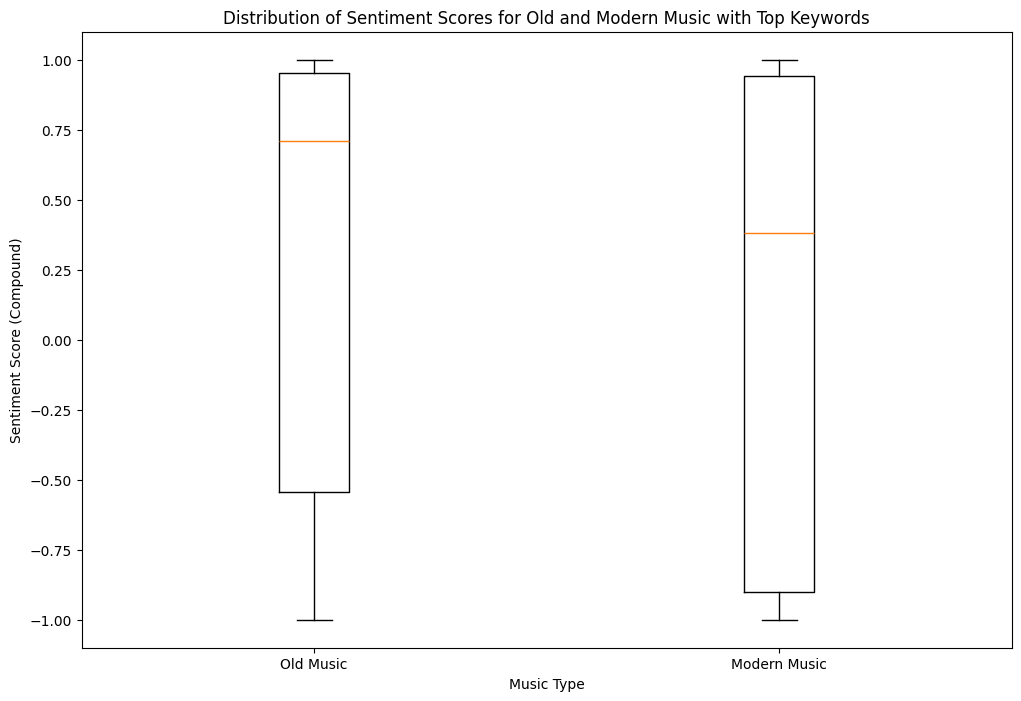

In [38]:
old_music_df = pd.DataFrame(old_music_sentiments)
modern_music_df = pd.DataFrame(modern_music_sentiments)

# Combining the DataFrames for easier plotting
combined_df = pd.concat([
    old_music_df.assign(MusicType='Old Music'),
    modern_music_df.assign(MusicType='Modern Music')
])

plt.figure(figsize=(12, 8))
plt.boxplot([old_music_df['compound'], modern_music_df['compound']], labels=['Old Music', 'Modern Music'])
plt.title('Distribution of Sentiment Scores for Old and Modern Music with Top Keywords')
plt.xlabel('Music Type')
plt.ylabel('Sentiment Score (Compound)')
plt.show()

This graph shows how the top keywords impact sentiment analysis and represents a more accurate representation of this result. This is because we are filtering the lyrics that contain similar keywords and therefore have a more accurate comparison.

Now let's see if we can find out more about the general topic of the lyrics by performing Latent Dirichlet Allocation (LDA)

In [39]:
old_music_lyrics_data = data[data['Old_Music'] == 1]['lyrics'].astype(str).tolist()

vectorizer = CountVectorizer(stop_words='english', max_features=5000)
bag_of_words_old = vectorizer.fit_transform(old_music_lyrics_data)
vocab_old = vectorizer.get_feature_names_out()

In [40]:
# Applying LDA and choosing a number of topics
num_topics = 5
labels = ['topic{}'.format(i) for i in range(num_topics)]

lda = LatentDirichletAllocation(n_components=num_topics, random_state=123, learning_method='batch')
lda_topics = lda.fit_transform(bag_of_words_old)

# Creating a DataFrame for topic weights
topic_weights = pd.DataFrame(lda.components_.T, index=vocab_old, columns=labels)

# Displaying the top terms for each topic
num_terms = 15
for i in range(num_topics):
    print("___topic " + str(i) + "___")
    topic_name = "topic" + str(i)
    weighted_list = topic_weights[topic_name].sort_values(ascending=False)[:num_terms]
    print(weighted_list.index.values)

___topic 0___
['live' 'world' 'come' 'fall' 'stand' 'life' 'like' 'know' 'hear'
 'remember' 'music' 'tell' 'people' 'head' 'dead']
___topic 1___
['time' 'long' 'sing' 'song' 'come' 'sweet' 'blue' 'hear' 'like' 'play'
 'home' 'bring' 'know' 'away' 'wind']
___topic 2___
['like' 'good' 'baby' 'feel' 'yeah' 'know' 'cause' 'little' 'come' 'wanna'
 'better' 'gonna' 'play' 'comin' 'girl']
___topic 3___
['heart' 'know' 'away' 'life' 'dream' 'come' 'hold' 'baby' 'leave' 'time'
 'want' 'feel' 'break' 'lonely' 'love']
___topic 4___
['right' 'night' 'home' 'time' 'tonight' 'gonna' 'know' 'change' 'believe'
 'money' 'come' 'hand' 'need' 'leave' 'fight']


And now on modern music lyrics

In [41]:
modern_music_lyrics_data = data[data['Modern_Music'] == 1]['lyrics'].astype(str).tolist()

vectorizer = CountVectorizer(stop_words='english', max_features=5000)
bag_of_words_modern = vectorizer.fit_transform(modern_music_lyrics_data)
vocab_modern = vectorizer.get_feature_names_out()

In [45]:
num_topics = 5
labels = ['topic{}'.format(i) for i in range(num_topics)]

lda = LatentDirichletAllocation(n_components=num_topics, random_state=123, learning_method='batch')
lda_topics = lda.fit_transform(bag_of_words_modern)

topic_weights = pd.DataFrame(lda.components_.T, index=vocab_modern, columns=labels)

num_terms = 15
for i in range(num_topics):
    print("___topic " + str(i) + "___")
    topic_name = "topic" + str(i)
    weighted_list = topic_weights[topic_name].sort_values(ascending=False)[:num_terms]
    print(weighted_list.index.values)

___topic 0___
['good' 'feel' 'want' 'money' 'like' 'fight' 'know' 'stand' 'music' 'time'
 'come' 'live' 'somebody' 'woah' 'need']
___topic 1___
['time' 'yeah' 'life' 'know' 'gonna' 'come' 'live' 'long' 'better' 'like'
 'change' 'sing' 'cause' 'mind' 'home']
___topic 2___
['away' 'know' 'world' 'come' 'life' 'live' 'leave' 'time' 'like' 'feel'
 'fall' 'lose' 'walk' 'eye' 'inside']
___topic 3___
['like' 'fuck' 'know' 'shit' 'bitch' 'cause' 'yeah' 'nigga' 'come'
 'niggas' 'wanna' 'tell' 'money' 'think' 'want']
___topic 4___
['heart' 'know' 'night' 'baby' 'hold' 'break' 'right' 'fall' 'come' 'feel'
 'like' 'leave' 'time' 'tonight' 'want']


When comparing the two results it is clear that old music topics are generally more neutral and positive compared to modern music ones with modern ones containing a lot more foul and swear words and generally negative topics. This is the most important finding in my research and analysis as it not only gives an overview of how the topics in music lyrics have evolved over time but also highlights how Sentiment Analysis interpreted the text and gave accurate results.